In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from api_keys import api_key

In [7]:
base_url = "https://api.usa.gov/crime/fbi/sapi/api/"

In [8]:
# NATIONAL LEVEL summary-controller

# Setting variable for offense so that you can easily have the URL filter by specific offense type
nat_since = "2009"
nat_until = "2019"

# This field can be age, count, ethnicity, race, sex
#nat_variable = "age"
# https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2000/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

# Building query URL
nat_query_url = f"{base_url}estimates/national/{nat_since}/{nat_until}?API_KEY={api_key}"

In [9]:
# Getting data
nat_fbi_response = requests.get(nat_query_url)
nat_fbi_json = nat_fbi_response.json()
nat_fbi_json

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 764057,
   'property_crime': 8024115,
   'burglary': 1587564,
   'larceny': 5723488,
   'motor_vehicle_theft': 713063,
   'arson': 44059},
  {'state_id': None,
   'state_abbr': '',
   'year': 2009,
   'population': 307006550,
   'violent_crime': 1325896,
   'homicide': 15399,
   'rape_legacy': 89241,
   'rape_revised': None,
   'robbery': 408742,
   'aggravated_assault': 812514,
   'property_crime': 9337060,
   'burglary': 2203313,
   'larceny': 6338095,
   'motor_vehicle_theft': 795652,
   'arson': 59866},
  {'state_id': None,
   'state_abbr': '',
   'year': 2010,
   'population': 309330219,
   'violent_crime': 1251248,
   'homicide': 14722,
   'rape_legacy': 85593,
   'rape_revised': None,
   'robbery': 369089,
   'aggravated_assault': 7818

In [10]:
# Testing if keys are correct to grab the specific data
print(nat_fbi_json["results"][0]["year"])

2015


In [11]:
# Creating lists to then later append with data from JSON data
nat_year = []
nat_population = []
nat_agg_assault = []
nat_arson = []
nat_burglary = []
nat_homicide = []
nat_larceny = []
nat_motor_theft = []
nat_prop_crime = []
nat_rape_legacy = []
nat_rape_revised = []
nat_robbery = []
nat_violent_crime = []
nat_num = 0

for x in nat_fbi_json["results"]:
    nat_year.append(nat_fbi_json["results"][nat_num]["year"])
    nat_population.append(nat_fbi_json["results"][nat_num]["population"])
    nat_agg_assault.append(nat_fbi_json["results"][nat_num]["aggravated_assault"])
    nat_arson.append(nat_fbi_json["results"][nat_num]["arson"])
    nat_burglary.append(nat_fbi_json["results"][nat_num]["burglary"])
    nat_homicide.append(nat_fbi_json["results"][nat_num]["homicide"])
    nat_larceny.append(nat_fbi_json["results"][nat_num]["larceny"])
    nat_motor_theft.append(nat_fbi_json["results"][nat_num]["motor_vehicle_theft"])
    nat_prop_crime.append(nat_fbi_json["results"][nat_num]["property_crime"])
    nat_rape_legacy.append(nat_fbi_json["results"][nat_num]["rape_legacy"])
    nat_rape_revised.append(nat_fbi_json["results"][nat_num]["rape_revised"])
    nat_robbery.append(nat_fbi_json["results"][nat_num]["robbery"])
    nat_violent_crime.append(nat_fbi_json["results"][nat_num]["violent_crime"])
    nat_num +=1

In [12]:
# Create a dictionary to hold the keys(titles) and lists
nat_fbi_dict = {
    "Data Year": nat_year,
    "Population": nat_population,
    "National Aggravated Assault": nat_agg_assault,
    "National Arson": nat_arson,
    "National Burglary": nat_burglary,
    "National Homicide": nat_homicide,
    "National Larceny": nat_larceny,
    "National Motor Vehicle Theft": nat_motor_theft,
    "National Property Crime": nat_prop_crime,
    "National Rape Legacy": nat_rape_legacy,
    "National Rape Revised": nat_rape_revised,
    "National Robbery":  nat_robbery,
    "National Violent Crime": nat_violent_crime
}

nat_fbi_df = pd.DataFrame(nat_fbi_dict)
nat_fbi_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
0,2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
1,2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896
2,2010,309330219,781844,55994,2168459,14722,6204601,739565,9112625,85593.0,NaN,369089,1251248
3,2011,311587816,752423,54555,2185140,14661,6151095,716508,9052743,84175.0,NaN,354772,1206031
4,2017,325147121,810319,42972,1397045,17294,5513000,772943,7682988,NaN,135666.0,320596,1283875
5,2012,313873685,762009,55368,2109932,14856,6168874,723186,9001992,85141.0,NaN,355051,1217057
6,2013,316497531,726777,47229,1932139,14319,6019465,700288,8651892,82109.0,113695.0,345093,1168298
7,2014,318907401,731089,46241,1713153,14164,5809054,686803,8209010,84864.0,118027.0,322905,1153022
8,2016,323405935,802982,45828,1516405,17413,5644835,767290,7928530,96970.0,132414.0,332797,1285606
9,2018,326687501,810982,39305,1235013,16374,5232167,751904,7219084,NaN,143765.0,281278,1252399


In [13]:
# Sorting new data frame by year
nat_sorted_df = nat_fbi_df.sort_values(by=["Data Year"])
nat_sorted_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
1,2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896
2,2010,309330219,781844,55994,2168459,14722,6204601,739565,9112625,85593.0,NaN,369089,1251248
3,2011,311587816,752423,54555,2185140,14661,6151095,716508,9052743,84175.0,NaN,354772,1206031
5,2012,313873685,762009,55368,2109932,14856,6168874,723186,9001992,85141.0,NaN,355051,1217057
6,2013,316497531,726777,47229,1932139,14319,6019465,700288,8651892,82109.0,113695.0,345093,1168298
7,2014,318907401,731089,46241,1713153,14164,5809054,686803,8209010,84864.0,118027.0,322905,1153022
0,2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
8,2016,323405935,802982,45828,1516405,17413,5644835,767290,7928530,96970.0,132414.0,332797,1285606
4,2017,325147121,810319,42972,1397045,17294,5513000,772943,7682988,NaN,135666.0,320596,1283875
9,2018,326687501,810982,39305,1235013,16374,5232167,751904,7219084,NaN,143765.0,281278,1252399


In [14]:
# Creating a new data frame to use when searching for specific info for graphing
year_search_df = nat_sorted_df.set_index("Data Year")


In [15]:
# Turning column into a list off the already sorted data frame
sorted_list = year_search_df["National Aggravated Assault"].tolist()
sorted_list

[812514,
 781844,
 752423,
 762009,
 726777,
 731089,
 764057,
 802982,
 810319,
 810982,
 821182]

In [16]:
national_avg = []
for x in sorted_list:
    national_avg.append(x/50)

In [17]:
national_avg

[16250.28,
 15636.88,
 15048.46,
 15240.18,
 14535.54,
 14621.78,
 15281.14,
 16059.64,
 16206.38,
 16219.64,
 16423.64]

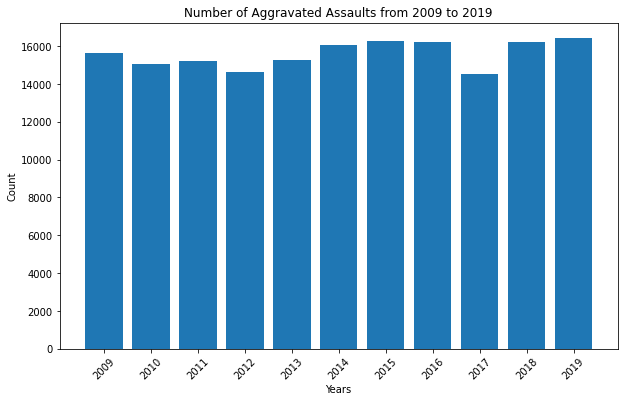

In [18]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(nat_year, national_avg)
plt.xticks(nat_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2009 to 2019")
plt.show()

In [21]:
# Pulling national population into a list
sorted_pop_list = year_search_df["Population"].tolist()
sorted_list

# Converting into national per capita
nat_per_capita = [(int(c) / int(p))*100000 for c,p in zip(sorted_list, sorted_pop_list)]
nat_per_capita


[264.6568941281546,
 252.7538378007614,
 241.4802381104658,
 242.77568857038779,
 229.63117522708257,
 229.2480505963548,
 238.1006707898679,
 248.28919729008683,
 249.2161079291857,
 248.243963273024,
 250.1776728453264]

In [23]:
# STATE LEVEL summary-controller

# Setting variable for offense so that you can easily have the URL filter by specific offense type
state_abr = "VA"
st_since = "2009"
st_until = "2019"

# This field can be age, count, ethnicity, race, sex
#nat_variable = "age"
#https://api.usa.gov/crime/fbi/sapi/api/estimates/states/Va/2000/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

# Building query URL
st_query_url = f"{base_url}estimates/states/{state_abr}/{st_since}/{st_until}?API_KEY={api_key}"
st_query_url

'https://api.usa.gov/crime/fbi/sapi/api/estimates/states/VA/2009/2019?API_KEY=cflHyG9x1XDXBgcVSb4tVrfvlJ40CZESdtJRqOVe'

In [24]:
# Getting data
st_fbi_response = requests.get(st_query_url)
st_fbi_json = st_fbi_response.json()
pprint(st_fbi_json)

{'pagination': {'count': 11, 'page': 0, 'pages': 1, 'per_page': 0},
 'results': [{'aggravated_assault': 9984,
              'arson': 833,
              'burglary': 18524,
              'homicide': 470,
              'larceny': 123812,
              'motor_vehicle_theft': 10179,
              'population': 8465207,
              'property_crime': 152515,
              'rape_legacy': None,
              'rape_revised': 3026,
              'robbery': 4331,
              'state_abbr': 'VA',
              'state_id': 51,
              'violent_crime': 17811,
              'year': 2017},
             {'aggravated_assault': 9911,
              'arson': 1362,
              'burglary': 31956,
              'homicide': 370,
              'larceny': 150374,
              'motor_vehicle_theft': 11690,
              'population': 7882590,
              'property_crime': 194020,
              'rape_legacy': 1572,
              'rape_revised': None,
              'robbery': 6342,
              'state

In [25]:
# Testing if keys are correct to grab the specific data
print(st_fbi_json["results"][0]["year"])

2017


In [26]:
# Creating lists to then later append with data from JSON data
st_year = []
st_population = []
st_agg_assault = []
st_arson = []
st_burglary = []
st_homicide = []
st_larceny = []
st_motor_theft = []
st_prop_crime = []
st_rape_legacy = []
st_rape_revised = []
st_robbery = []
st_violent_crime = []
st_num = 0

for x in st_fbi_json["results"]:
    st_year.append(st_fbi_json["results"][st_num]["year"])
    st_population.append(st_fbi_json["results"][st_num]["population"])
    st_agg_assault.append(st_fbi_json["results"][st_num]["aggravated_assault"])
    st_arson.append(st_fbi_json["results"][st_num]["arson"])
    st_burglary.append(st_fbi_json["results"][st_num]["burglary"])
    st_homicide.append(st_fbi_json["results"][st_num]["homicide"])
    st_larceny.append(st_fbi_json["results"][st_num]["larceny"])
    st_motor_theft.append(st_fbi_json["results"][st_num]["motor_vehicle_theft"])
    st_prop_crime.append(st_fbi_json["results"][st_num]["property_crime"])
    st_rape_legacy.append(st_fbi_json["results"][st_num]["rape_legacy"])
    st_rape_revised.append(st_fbi_json["results"][st_num]["rape_revised"])
    st_robbery.append(st_fbi_json["results"][st_num]["robbery"])
    st_violent_crime.append(st_fbi_json["results"][st_num]["violent_crime"])
    st_num +=1

In [27]:
# Create a dictionary to hold the keys(titles) and lists
st_fbi_dict = {
    "Data Year": st_year,
    "Virginia Population": st_population,
    "Virginia Aggravated Assault": st_agg_assault,
    "Virginia Arson": st_arson,
    "Virginia Burglary": st_burglary,
    "Virginia Homicide": st_homicide,
    "Virginia Larceny": st_larceny,
    "Virginia Motor Vehicle Theft": st_motor_theft,
    "Virginia Property Crime": st_prop_crime,
    "Virginia Rape Legacy": st_rape_legacy,
    "Virginia Rape Revised": st_rape_revised,
    "Virginia Robbery":  st_robbery,
    "Virginia Violent Crime": st_violent_crime
}

st_fbi_df = pd.DataFrame(st_fbi_dict)
st_fbi_df

,Data Year,Virginia Population,Virginia Aggravated Assault,Virginia Arson,Virginia Burglary,Virginia Homicide,Virginia Larceny,Virginia Motor Vehicle Theft,Virginia Property Crime,Virginia Rape Legacy,Virginia Rape Revised,Virginia Robbery,Virginia Violent Crime
0,2017,8465207,9984,833,18524,470,123812,10179,152515,NaN,3026.0,4331,17811
1,2009,7882590,9911,1362,31956,370,150374,11690,194020,1572.0,NaN,6342,18195
2,2010,8023953,9550,1249,30804,376,145990,10609,187403,1580.0,NaN,5678,17184
3,2011,8104384,8694,1179,30656,304,142476,9770,182902,1591.0,NaN,5425,16014
4,2012,8186628,9131,1255,29651,322,139654,9129,178434,1505.0,NaN,4718,15676
5,2014,8328098,9462,876,23210,350,131001,7723,161934,1687.0,2416.0,4294,16522
6,2015,8367587,9357,907,21542,390,128064,8197,157803,1767.0,2499.0,4459,16705
7,2013,8270345,9111,955,26717,320,136215,8626,171558,1476.0,2350.0,4574,16355
8,2016,8414380,10357,904,20159,482,127285,9848,157292,2032.0,2830.0,4826,18495
9,2018,8501286,10258,681,15659,417,116496,10776,142931,NaN,3072.0,3610,17357


In [28]:
# Sorting new data frame by year
st_sorted_df = st_fbi_df.sort_values(by=["Data Year"])

In [29]:
# Creating a new data frame to use when searching for specific info for graphing
va_year_search_df = st_sorted_df.set_index("Data Year")

In [30]:
# Turning column into a list off the already sorted data frame
va_sorted_list = va_year_search_df["Virginia Aggravated Assault"].tolist()
va_sorted_list

[9911, 9550, 8694, 9131, 9111, 9462, 9357, 10357, 9984, 10258, 10987]

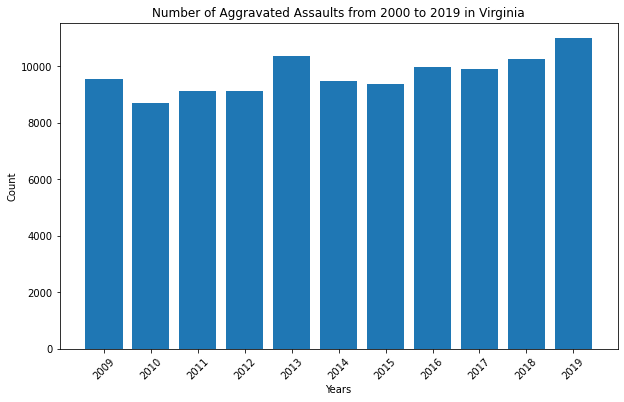

In [31]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(st_year, va_sorted_list)
plt.xticks(st_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2000 to 2019 in Virginia")
plt.show()

In [34]:
# Pulling VA population as list
va_sorted_pop_list = va_year_search_df["Virginia Population"].tolist()
va_sorted_list

# Converting data to per capita
va_per_capita = [(int(c) / int(p))*100000 for c,p in zip(va_sorted_list, va_sorted_pop_list)]
va_per_capita


[125.73278579756145,
 119.01864330461558,
 107.27527224771187,
 111.53554308318394,
 110.1646908321237,
 113.61537772490188,
 111.82435270765635,
 123.08690598713154,
 117.94159315891507,
 120.664097173063,
 128.72093659448242]

<Figure size 1440x3600 with 0 Axes>

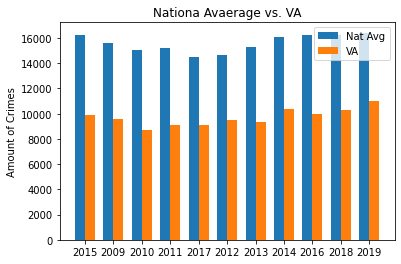

In [69]:
plt.figure(figsize=(20,50))
x = np.arange(len(nat_year))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, national_avg, width, label='Nat Avg')
rects2 = ax.bar(x + width/2, va_sorted_list, width, label='VA')

ax.set_ylabel('Years')
ax.set_ylabel('Amount of Crimes')
ax.set_title('National Average vs. VA')
ax.set_xticks(x)
ax.set_xticklabels(nat_year)
ax.legend()

#fig.tight_layout()

plt.show()


<Figure size 1440x3600 with 0 Axes>

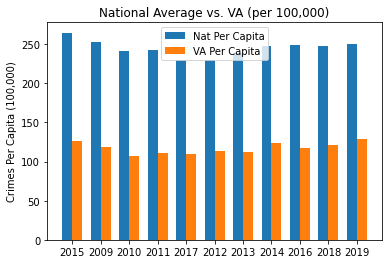

In [43]:
# GRAPHING PER CAPITA DATA
plt.figure(figsize=(20,50))
x = np.arange(len(nat_year))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nat_per_capita, width, label='Nat Per Capita')
rects2 = ax.bar(x + width/2, va_per_capita, width, label='VA Per Capita')

ax.set_ylabel('Years')
ax.set_ylabel('Crimes Per Capita (100,000)')
ax.set_title('National Average vs. VA (per 100,000)')
ax.set_xticks(x)
ax.set_xticklabels(nat_year)
ax.legend(loc="best")

#fig.tight_layout()

plt.show()

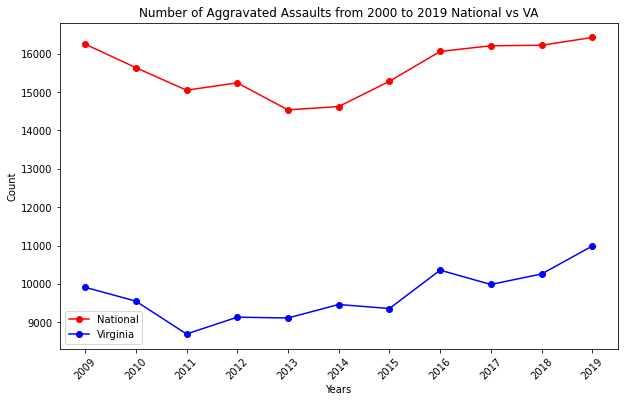

In [39]:
plt.figure(figsize=(10,6))
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
graph, = plt.plot(years, national_avg, marker = "o", color="red", label="National")
graph2, = plt.plot(years, va_sorted_list, marker = "o", color="blue", label="Virginia")
plt.xticks(nat_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2000 to 2019 National vs VA")
plt.legend(handles=[graph, graph2], loc="best")
plt.show()

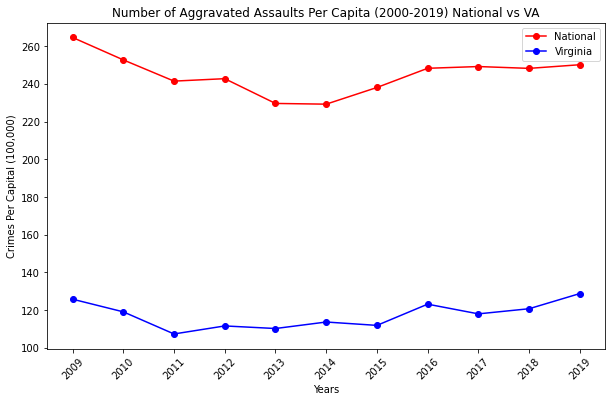

In [40]:
# GRAPHING PER CAPITA DATA
plt.figure(figsize=(10,6))
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
graph, = plt.plot(years, nat_per_capita, marker = "o", color="red", label="National")
graph2, = plt.plot(years, va_per_capita, marker = "o", color="blue", label="Virginia")
plt.xticks(nat_year, rotation=45)

plt.xlabel("Years")
plt.ylabel("Crimes Per Capital (100,000)")
plt.title("Number of Aggravated Assaults Per Capita (2000-2019) National vs VA")
plt.legend(handles=[graph, graph2], loc="best")
plt.show()